<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating the Sine function

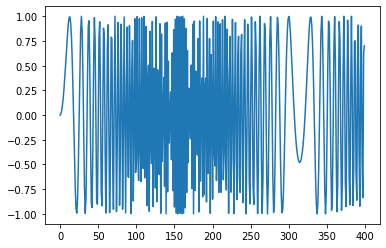

In [8]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)

# Build Dataset

In [35]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X shape is:", X.shape)
print("Y shape is:", Y.shape)


X shape is: (390, 10)
Y shape is: (390,)


# Creating the Model

In [36]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(optimizer = Adam(lr = 0.01), loss = 'mse')

r = model.fit(X[:-N//2], Y[:-N//2], validation_data = (X[-N//2:], Y[-N//2:]), epochs = 80)

Epoch 1/80
7/7 [==============================] - 0s 11ms/step - loss: 1.1542 - val_loss: 1.0748
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 1.0232 - val_loss: 0.9514
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.9180 - val_loss: 0.8499
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.8283 - val_loss: 0.7779
Epoch 5/80
7/7 [==============================] - 0s 5ms/step - loss: 0.7581 - val_loss: 0.7110
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.7018 - val_loss: 0.6571
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6588 - val_loss: 0.6234
Epoch 8/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6224 - val_loss: 0.5970
Epoch 9/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5923 - val_loss: 0.5707
Epoch 10/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5672 - val_loss: 0.5486
Epoch 11/80
7/7 [=====================

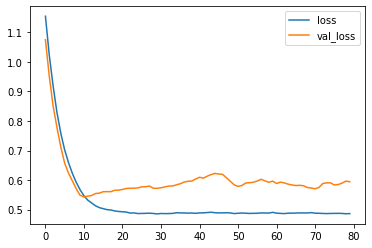

In [37]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


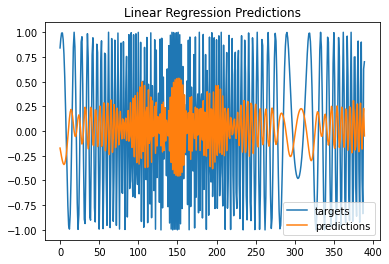

In [38]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

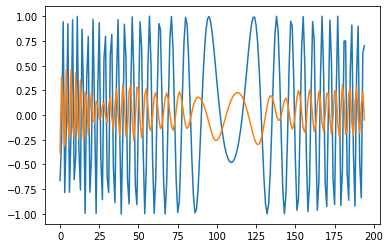

In [44]:
validation_target = Y[-N//2:]
validation_predictions = []
i=-N//2
while len(validation_target) > len(validation_predictions):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i+=1
  validation_predictions.append(p)
  

plt.plot(validation_target)
plt.plot(validation_predictions)

# Multi step forecast

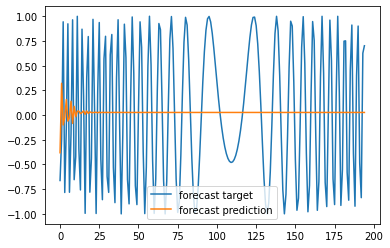

In [46]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

# Using LSTM Model instead

In [47]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 55ms/step - loss: 0.5244 - val_loss: 0.6486
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5014 - val_loss: 0.5675
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4474 - val_loss: 0.5724
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3769 - val_loss: 0.5528
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3001 - val_loss: 0.3399
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2465 - val_loss: 0.3688
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2039 - val_loss: 0.3568
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1548 - val_loss: 0.2350
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1035 - val_loss: 0.2860
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0800 - val_loss: 0.2275
Epoch 11/200
7/7 [======

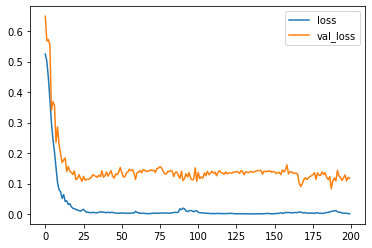

In [49]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# One Step forecast

(390, 1)


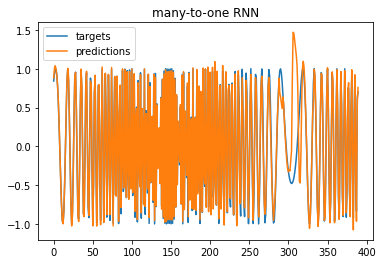

In [48]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

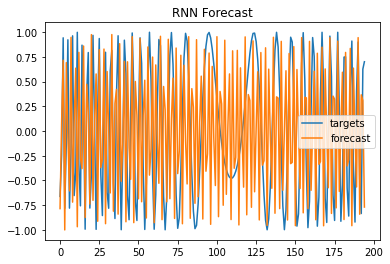

In [50]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()